# CESI HumanForYou

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

* Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

* Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

* Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à notre équipe, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

### Table des matières

1. [Préparation de l'environnement](#chapter1)
    1. [Importation des librairies](#section_1_1)
    2. [Importation des données](#Section_1_2)
2. [Visualisation des données](#chapter2)
    1. [Données du service des ressources humaines](#section_2_1)
    2. [Dernière évaluation du manager](#section_2_2)
    3. [Enquête qualité de vie au travail](#section_2_3)
    4. [Horaires de travail](#section_2_4)
3. [Transformation des données](#chapter3)
    1. [Calcul des durées de travail](#section_3_1)
    2. [Concaténation des données](#section_3_2)
    3. [Ajout de valeur](#section_3_3)
    4. [Suppression colonne](#section_3_4)
    5. [Normalisation](#section_3_5)
4. [Analyses statistiques](#chapter4)
    1. [Analyse des données entrantes](#section_4_1)
    2. [Analyse de l'attrition](#section_4_2)
5. [Algorithmes](#chapter5)


<a id="chapter1"></a>
## Préparation de l'environnement

<a id="section_1_1"></a>
### Importation des librairies

Tout d'abord, nous devons importer toutes les bibliothèques que nous utiliserons.

In [1]:
# imports
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

<a id="section_1_2"></a>
### Importation des données

Les données utilisées pour nos analyses proviennent de fichier CSV depuis Github et doivent être charger dans nos variables.

In [2]:
#Importation des données depuis Github 
general_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/general_data.csv"
manager_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/manager_survey_data.csv"
employee_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/employee_survey_data.csv"
in_time_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/in_time.csv"
out_time_url = "https://raw.githubusercontent.com/anthonylorendeaux/CESI-IA-CSV/master/out_time.csv"

#Lecture des csv
general_info_data = pd.read_csv(general_url)
manager_survey_data = pd.read_csv(manager_url)
employee_survey_data = pd.read_csv(employee_url)
in_time_data = pd.read_csv(in_time_url)
out_time_data = pd.read_csv(out_time_url)

<a id="chapter2"></a>
## Visualisation des données

Dans un premier temps, nous regardons toutes les données que nous avons. Un certain nombre de données concernant les employés nous a donc été transmis par le service des ressources humaines ainsi que par des fiches d'évaluation.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

<a id="section_2_1"></a>
### Données du service des ressources humaines

Pour chaque employé, le service des ressources humaines vous confie les informations en sa possession :

* Age : L'âge de l'employé en 2015.
* Attrition : L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016 ?

* BusinessTravel : A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 ? (Non-Travel = jamais, Travel_Rarely= rarement, Travel_Frequently = fréquemment)

* DistanceFromHome : Distance en km entre le logement de l'employé et l'entreprise.

* Education : Niveau d'étude : 1=Avant College (équivalent niveau Bac), 2=College (équivalent Bac+2), 3=Bachelor (Bac+3), 4=Master (Bac+5) et 5=PhD (Thèse de doctorat).

* EducationField : Domaine d'étude, matière principale

* EmployeeCount : booléen à 1 si l'employé était compté dans les effectifs en 2015.

* EmployeeId : l'identifiant d'un employé

* Gender : Sexe de l'employé

* JobLevel : Niveau hiérarchique dans l'entreprise de 1 à 5

* JobRole : Métier dans l'entreprise

* MaritalStatus : Statut marital du salarié (Célibataire, Marié ou Divorcé).

* MonthlyIncome : Salaire brut en roupies par mois

* NumCompaniesWorked : Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou.

* Over18 : Est-ce que le salarié a plus de 18 ans ou non ?

* PercentSalaryHike : % d'augmentation du salaire en 2015.

* StandardHours : Nombre d'heures par jour dans le contrat du salarié.

* StockOptionLevel : Niveau d'investissement en actions de l'entreprise par le salarié.

* TotalWorkingYears : Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.

* TrainingTimesLastYear : Nombre de jours de formation en 2015

* YearsAtCompany : Ancienneté dans l'entreprise

* YearsSinceLastPromotion : Nombre d'années depuis la dernière augmentation individuelle

* YearsWithCurrentManager : Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.



In [3]:
general_info_data.head(5)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

Il est aussi intéressant de connaitre le type des variables qui composent le fichier.

In [4]:
print('Shape of general_info_data :',general_info_data.shape)
general_info_data.info()

Shape of general_info_data : (4410, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null

<a id="section_2_2"></a>
### Dernière évaluation du manager

Ce fichier contient la dernière évaluation de chaque employé faite pas son manager en février 2015.

Il contient les données suivantes :

* L'identifiant de l'employé : EmployeeID

* Une évaluation de son implication dans son travail notée 1 ('Faible'), 2 ("Moyenne"), 3 ("Importante") ou 4 ("Très importante") : JobInvolvement

* Une évaluation de son niveau de performance annuel pour l'entreprise notée 1 ("Faible"), 2 ("Bon"), 3 ("Excellent") ou 4 ("Au delà des attentes") : PerformanceRating

In [5]:
manager_survey_data.head(3)

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3

Type des données :

In [6]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


<a id="section_2_3"></a>
### Enquête qualité de vie au travail

Ce fichier provient d'une enquête soumise aux employés en juin 2015 par le service RH pour avoir un retour concernant leur qualité de vie au travail.

Une organisation avait été mise en place pour que chacun puisse répondre à ce questionnaire sur son lieu de travail en concertation avec les managers mais il n'y avait pas d'obligation.

Les employés devaient répondre à 3 questions sur le niveau de satisfaction concernant :

* L'environnement de travail, noté 1 ("Faible"), 2 ("Moyen"), 3 ("Élevé") ou 4 ("Très élevé") : EnvironmentSatisfaction

* Son travail, noté de 1 à 4 comme précédemment : JobSatisfaction

* Son équilibre entre vie professionnelle et vie privée, noté 1 ("Mauvais"), 2 ("Satisfaisant"), 3 ("Très satisfaisant") ou 4 ("Excellent") : WorkLifeBalance

Lorsque un employé n'a pas répondu à une question, le texte "NA" apparaît à la place de la note.

In [7]:
employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

Type des données :

In [8]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


<a id="section_2_4"></a>
### Horaires de travail

Des badgeuses sont installées et utilisées dans l'entreprise depuis quelques années. Il a été jugé opportun par la direction de nous transmettre les horaires d'entrée et de sortie des employés sur une période de l'année choisie représentative d'une activité moyenne pour l'ensemble des services.

Nous avons donc 2 fichiers traçants les horaires d'arrivée à leur poste et de départ de leur poste de l'ensemble des employés par date sur une période allant du 1er janvier au 31 décembre 2015.

Données d'arrivée des employées:

In [9]:
in_time_data.head(2)

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  

[2 rows x 262 columns]

Type des données :

In [10]:
in_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


Données de départ des employées: 

In [11]:
out_time_data.head(2)

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  

[2 rows x 262 columns]

Type des données :

In [12]:
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


<a id="chapter3"></a>
## Transformation des données

Plusieurs données ne peuvent pas être exploiter en l'état, il faut donc trier et retravailler les données.

<a id="section_3_1"></a>
### Calcul des durées de travail

Les données de temps ne sont pas exploitables sous cette forme, il faut donc les tranformer.

Avoir des heures d'entrées et de sortie de nos employés n'est pas très significatifs, c'est pour cela que nous remplaçons toutes les valeurs par la moyenne de temps de travail de chaque employé.

Cependant : 
* Les dates sont stockées en tant que chaine de caractère et il est compliqué de les exploiter.
* Cetaines données valent "NaN", ce qui veut dire qu'un employé a été absent au travail

Pour remédier à ça, nous transformons les données en objet Datetime. De plus lorsqu'un employé est absent au travail, son temps moyen de travail est de 0 donc nous remplaçons les NaN par 0.

Avant de mettre en place nos changements, nous devons renommer la colonne (sans nom) qui correspond aux IDs des employés. Cette actions est prise puisque dans le csv nous avons le même nombre de ligne que sur les autres csv.

In [13]:
# Renommage des colonnes sans nom de nos csv in et out
in_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
in_time_data.set_index('EmployeeID', inplace=True)
in_time_data
out_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time_data.set_index('EmployeeID', inplace=True)

# Suppression des colonnesoù l'employée est absent (valeur NaN)
in_time_data=in_time_data.dropna(axis=1,how='all')
out_time_data=out_time_data.dropna(axis=1,how='all')

# Remplacement des NaN par 0
in_time_data.fillna(0, inplace=True)
out_time_data.fillna(0, inplace=True)

out_time_data.head(3)

2015-01-02           2015-01-05           2015-01-06  \
EmployeeID                                                                  
1           2015-01-02 16:56:15  2015-01-05 17:20:11  2015-01-06 17:19:05   
2           2015-01-02 18:22:17  2015-01-05 17:48:22                    0   
3           2015-01-02 16:59:14  2015-01-05 17:06:46  2015-01-06 16:38:32   

                     2015-01-07           2015-01-08           2015-01-09  \
EmployeeID                                                                  
1           2015-01-07 16:34:55  2015-01-08 17:08:32  2015-01-09 17:38:29   
2           2015-01-07 17:09:06  2015-01-08 17:34:04  2015-01-09 16:52:29   
3           2015-01-07 16:33:21  2015-01-08 17:24:22  2015-01-09 16:57:30   

                     2015-01-12           2015-01-13           2015-01-15  \
EmployeeID                                                                  
1           2015-01-12 16:58:39  2015-01-13 18:02:58  2015-01-15 17:22:13   
2           2015-01-12 17:36:48  2015-01-13 18:00:13  2015-01-15 17:14:44   
3           2015-01-12 17:28:54  2015-01-13 17:21:25  2015-01-15 17:21:29   

                     2015-01-16  ...           2015-12-17  \
EmployeeID                       ...                        
1           2015-01-16 17:35:11  ...                    0   
2           2015-01-16 17:40:57  ...  2015-12-17 17:10:50   
3           2015-01-16 17:18:13  ...  2015-12-17 17:06:23   

                     2015-12-18           2015-12-21           2015-12-22  \
EmployeeID                                                                  
1                             0  2015-12-21 17:15:50  2015-12-22 17:27:51   
2           2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
3           2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   

                     2015-12-23           2015-12-24           2015-12-28  \
EmployeeID                                                                  
1           2015-12-23 16:44:44  2015-12-24 17:47:22  2015-12-28 18:00:07   
2           2015-12-23 17:38:18                    0  2015-12-28 17:08:38   
3           2015-12-23 16:59:43  2015-12-24 16:58:25  2015-12-28 16:43:31   

                     2015-12-29           2015-12-30           2015-12-31  
EmployeeID                                                                 
1           2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
2           2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
3           2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  

[3 rows x 249 columns]

On transforme nos chaines de caractère en objets datetime.

In [14]:
for date in in_time_data.columns:
    in_time_data[date]=pd.to_datetime(in_time_data[date])
    out_time_data[date]=pd.to_datetime(out_time_data[date])

On calcule dans un nouveau dataset le nombre d'heure passé qu'en employé passe au travail par jour.

In [15]:
time_work_per_day=pd.DataFrame()

cols=in_time_data.columns
for col in cols:
    time_work_per_day[col]=((out_time_data[col] - in_time_data[col]).dt.total_seconds() /3600)

time_work_per_day.head()

2015-01-02  2015-01-05  2015-01-06  2015-01-07  2015-01-08  \
EmployeeID                                                               
1             7.208333    7.189722    7.410833    7.006667    7.289722   
2             8.109167    7.454722    0.000000    7.396944    7.416667   
3             6.692500    7.265556    6.405278    6.765000    7.345000   
4             7.338333    7.291944    6.943056    6.919444    6.850833   
5             8.055556    7.988056    7.682500    7.806111    7.662222   

            2015-01-09  2015-01-12  2015-01-13  2015-01-15  2015-01-16  ...  \
EmployeeID                                                              ...   
1             7.484444    7.262778    7.831111    7.346944    7.267500  ...   
2             7.150833    7.611389    7.278889    7.613056    7.727500  ...   
3             6.861389    7.418611    6.999722    7.438333    7.210278  ...   
4             7.193056    6.998611    7.306389    6.876667    6.907778  ...   
5             7.721667    8.365000    8.257222    8.260000    8.403611  ...   

            2015-12-17  2015-12-18  2015-12-21  2015-12-22  2015-12-23  \
EmployeeID                                                               
1             0.000000    0.000000    7.339167    7.395833    6.504722   
2             7.928333    7.903056    7.753889    7.712222    7.435556   
3             7.218333    6.785833    7.163611    6.801667    6.730278   
4             7.455833    7.629167    6.846667    7.326389    7.413611   
5             8.320000    7.903611    7.665000    7.957500    7.786944   

            2015-12-24  2015-12-28  2015-12-29  2015-12-30  2015-12-31  
EmployeeID                                                              
1             7.596389    7.773889    7.315000    7.778889    7.080278  
2             0.000000    7.614722    7.982500    7.986111    8.227222  
3             6.849722    7.023889    7.438889    7.538889    6.786389  
4             7.085000    7.447222    7.416667    7.366389    7.133056  
5             8.249444    7.662222    8.268611    7.953333    8.018056  

[5 rows x 249 columns]

Nous ajoutons ensuite une colonne représentant : 
* La moyenne de temps passsé au travail par employé sur l'année 2015 
* Le nombre d'absences au travail par employé durant l'année 2015 

Les autres colonnes sont ensuite supprimées.

In [16]:
time_work_per_day['MeanTimeWorkOverYear2015']=round(time_work_per_day.astype(int).mean(axis=1),2)
time_work_per_day['absences_par_jour']=(time_work_per_day == 0).astype(int).sum(axis=1)
time_work_per_day = time_work_per_day.drop((time_work_per_day.columns[0:-2]), axis = 1)
time_work_per_day.head()

MeanTimeWorkOverYear2015  absences_par_jour
EmployeeID                                             
1                               6.43                 17
2                               6.79                 13
3                               6.30                  7
4                               6.36                 14
5                               7.35                  4

<a id="section_3_2"></a>
### Concaténation des données

Pour la suite des analyses, nous allons rassembler toutes les données sur une même variable. Comme sur chaque csv, l'ID des employées est inscrit, il est facile de concater les données.

In [17]:
concat_time_csv = general_info_data.merge(time_work_per_day, on='EmployeeID')
concat_manager_csv = concat_time_csv.merge(manager_survey_data, on='EmployeeID')
temp_concat = concat_manager_csv.merge(employee_survey_data, on='EmployeeID')
temp_concat = temp_concat.set_index('EmployeeID')
temp_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4410 non-null   int64  
 1   Attrition                 4410 non-null   object 
 2   BusinessTravel            4410 non-null   object 
 3   Department                4410 non-null   object 
 4   DistanceFromHome          4410 non-null   int64  
 5   Education                 4410 non-null   int64  
 6   EducationField            4410 non-null   object 
 7   EmployeeCount             4410 non-null   int64  
 8   Gender                    4410 non-null   object 
 9   JobLevel                  4410 non-null   int64  
 10  JobRole                   4410 non-null   object 
 11  MaritalStatus             4410 non-null   object 
 12  MonthlyIncome             4410 non-null   int64  
 13  NumCompaniesWorked        4391 non-null   float64
 14  Over18  

A l'aide des informations précédentes, nous remarquons plusieurs choses:
* Tous les champs ne possèdent pas le même nombre de tuples
* Les champs ayants un type objet corréspondent à des variables qualitatives

Pour la suite des analyses, nous devons d'abord harmoniser nos données pour ne plus avoir les deux remarques précédentes.

<a id="section_3_3"></a>
### Ajout de valeur

Pour palier au manque de certaines données, nous comblons les valeurs manquantes par la valeur médiane de ses champs.


In [18]:
# Nombre de champs avec des valeurs vides
final_data = temp_concat.copy()
final_data[final_data.columns[final_data.isnull().any()]].isnull().sum()

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [19]:
# Ajout des valeurs médianes
final_data.fillna(round(final_data.median()),inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4410 non-null   int64  
 1   Attrition                 4410 non-null   object 
 2   BusinessTravel            4410 non-null   object 
 3   Department                4410 non-null   object 
 4   DistanceFromHome          4410 non-null   int64  
 5   Education                 4410 non-null   int64  
 6   EducationField            4410 non-null   object 
 7   EmployeeCount             4410 non-null   int64  
 8   Gender                    4410 non-null   object 
 9   JobLevel                  4410 non-null   int64  
 10  JobRole                   4410 non-null   object 
 11  MaritalStatus             4410 non-null   object 
 12  MonthlyIncome             4410 non-null   int64  
 13  NumCompaniesWorked        4410 non-null   float64
 14  Over18  

<a id="section_3_4"></a>
### Suppression de colonne

Il est important de vérifier qu'il n'y est pas des champs avec valeur similaire partout. Cela signifit que l'information n'est pas pertinente et qu'elle peut être supprimer.


In [20]:
final_data.describe(include='all').T

count unique                     top  freq  \
Age                       4410.0    NaN                     NaN   NaN   
Attrition                   4410      2                      No  3699   
BusinessTravel              4410      3           Travel_Rarely  3129   
Department                  4410      3  Research & Development  2883   
DistanceFromHome          4410.0    NaN                     NaN   NaN   
Education                 4410.0    NaN                     NaN   NaN   
EducationField              4410      6           Life Sciences  1818   
EmployeeCount             4410.0    NaN                     NaN   NaN   
Gender                      4410      2                    Male  2646   
JobLevel                  4410.0    NaN                     NaN   NaN   
JobRole                     4410      9         Sales Executive   978   
MaritalStatus               4410      3                 Married  2019   
MonthlyIncome             4410.0    NaN                     NaN   NaN   
NumCompaniesWorked        4410.0    NaN                     NaN   NaN   
Over18                      4410      1                       Y  4410   
PercentSalaryHike         4410.0    NaN                     NaN   NaN   
StandardHours             4410.0    NaN                     NaN   NaN   
StockOptionLevel          4410.0    NaN                     NaN   NaN   
TotalWorkingYears         4410.0    NaN                     NaN   NaN   
TrainingTimesLastYear     4410.0    NaN                     NaN   NaN   
YearsAtCompany            4410.0    NaN                     NaN   NaN   
YearsSinceLastPromotion   4410.0    NaN                     NaN   NaN   
YearsWithCurrManager      4410.0    NaN                     NaN   NaN   
MeanTimeWorkOverYear2015  4410.0    NaN                     NaN   NaN   
absences_par_jour         4410.0    NaN                     NaN   NaN   
JobInvolvement            4410.0    NaN                     NaN   NaN   
PerformanceRating         4410.0    NaN                     NaN   NaN   
EnvironmentSatisfaction   4410.0    NaN                     NaN   NaN   
JobSatisfaction           4410.0    NaN                     NaN   NaN   
WorkLifeBalance           4410.0    NaN                     NaN   NaN   

                                  mean           std      min      25%  \
Age                           36.92381      9.133301     18.0     30.0   
Attrition                          NaN           NaN      NaN      NaN   
BusinessTravel                     NaN           NaN      NaN      NaN   
Department                         NaN           NaN      NaN      NaN   
DistanceFromHome              9.192517      8.105026      1.0      2.0   
Education                     2.912925      1.023933      1.0      2.0   
EducationField                     NaN           NaN      NaN      NaN   
EmployeeCount                      1.0           0.0      1.0      1.0   
Gender                             NaN           NaN      NaN      NaN   
JobLevel                      2.063946      1.106689      1.0      1.0   
JobRole                            NaN           NaN      NaN      NaN   
MaritalStatus                      NaN           NaN      NaN      NaN   
MonthlyIncome             65029.312925  47068.888559  10090.0  29110.0   
NumCompaniesWorked            2.691837      2.493912      0.0      1.0   
Over18                             NaN           NaN      NaN      NaN   
PercentSalaryHike            15.209524      3.659108     11.0     12.0   
StandardHours                      8.0           0.0      8.0      8.0   
StockOptionLevel              0.793878      0.851883      0.0      0.0   
TotalWorkingYears            11.277324       7.77449      0.0      6.0   
TrainingTimesLastYear          2.79932      1.288978      0.0      2.0   
YearsAtCompany                7.008163      6.125135      0.0      3.0   
YearsSinceLastPromotion       2.187755      3.221699      0.0      0.0   
YearsWithCurrManager          4.123129      3.567327      0.0

A l'aide de ce tableau, nous remarquons qu'il existe des champs à valeur unique :
- EmployeeCount : la valeur min et max est égale à 1
- Over18 : cette varible possède une unique valeur (unique = 1)
- StandardHours : la valeur min et max est égale à 8

Nous supprimons donc ces champs pour la suite des travaux.

In [21]:
final_data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace = True)
final_data.head(5)

Age Attrition     BusinessTravel              Department  \
EmployeeID                                                             
1            51        No      Travel_Rarely                   Sales   
2            31       Yes  Travel_Frequently  Research & Development   
3            32        No  Travel_Frequently  Research & Development   
4            38        No         Non-Travel  Research & Development   
5            32        No      Travel_Rarely  Research & Development   

            DistanceFromHome  Education EducationField  Gender  JobLevel  \
EmployeeID                                                                 
1                          6          2  Life Sciences  Female         1   
2                         10          1  Life Sciences  Female         1   
3                         17          4          Other    Male         4   
4                          2          5  Life Sciences    Male         3   
5                         10          1        Medical    Male         1   

                              JobRole  ... YearsAtCompany  \
EmployeeID                             ...                  
1           Healthcare Representative  ...              1   
2                  Research Scientist  ...              5   
3                     Sales Executive  ...              5   
4                     Human Resources  ...              8   
5                     Sales Executive  ...              6   

            YearsSinceLastPromotion  YearsWithCurrManager  \
EmployeeID                                                  
1                                 0                     0   
2                                 1                     4   
3                                 0                     3   
4                                 7                     5   
5                                 0                     4   

            MeanTimeWorkOverYear2015  absences_par_jour  JobInvolvement  \
EmployeeID                                                                
1                               6.43                 17               3   
2                               6.79                 13               2   
3                               6.30                  7               3   
4                               6.36                 14               2   
5                               7.35                  4               3   

            PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
EmployeeID                                                                
1                           3                      3.0              4.0   
2                           4                      3.0              2.0   
3                           3                      2.0              2.0   
4                           3                      4.0              4.0   
5                           3                      4.0              1.0   

            WorkLifeBalance  
EmployeeID                   
1                       2.0  
2                       4.0  
3                       1.0  
4                       3.0  
5                       3.0  

[5 rows x 27 columns]

<a id="section_3_5"></a>
### Normalisation

Comme dans la suite de ce projet nous devrons utiliser des algorithmes de machine learning, il est important de prendre en compte les recommandations de ses derniers. Comme de nombreux algorithmes d'apprentissage automatique ne peuvent pas fonctionner directement sur des données qualitatives, nous devons prévoir un ensemble de données dont toutes les variables d'entrée et les variables de sortie soient numériques.

Afin de n'avoir que des données quantitatives, nous utilisons le One-hot Encoding. Quand une variables n'est pas ordinale, cette solution va créer des variables supplémentaires dans le jeu de donnée pour représenter chacune des catégories.

Les champs concernés sont : "BusinessTravel","Department","EducationField", "JobRole","MaritalStatus", "Gender".
Et vont être remplacés par : 
* BusinessTravel_Non-Travel
* BusinessTravel_Travel_Frequently
* BusinessTravel_Travel_Rarely
* Department_Human Resources
* Department_Research & Development
* Department_Sales
* EducationField_Human Resources
* EducationField_Life Sciences
* EducationField_Marketing
* EducationField_Medical
* EducationField_Other
* EducationField_Technical Degree
* JobRole_Healthcare Representative
* JobRole_Human Resources
* JobRole_Manufacturing Director	
* JobRole_Research Director	
* JobRole_Research Scientist	
* JobRole_Sales Executive	
* JobRole_Sales Representative	
* MaritalStatus_Divorced	
* MaritalStatus_Married	
* MaritalStatus_Single	
* Gender_Female	
* Gender_Male

In [22]:
# One-hot Encoding
final_data2 = pd.get_dummies(final_data, 
prefix=["BusinessTravel","Department","EducationField", "JobRole","MaritalStatus", "Gender"],
columns=["BusinessTravel","Department","EducationField", "JobRole","MaritalStatus", "Gender"])
final_data2.head(5)

Age Attrition  DistanceFromHome  Education  JobLevel  \
EmployeeID                                                         
1            51        No                 6          2         1   
2            31       Yes                10          1         1   
3            32        No                17          4         4   
4            38        No                 2          5         3   
5            32        No                10          1         1   

            MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
EmployeeID                                                         
1                  131160                 1.0                 11   
2                   41890                 0.0                 23   
3                  193280                 1.0                 15   
4                   83210                 3.0                 11   
5                   23420                 4.0                 12   

            StockOptionLevel  TotalWorkingYears  ...  \
EmployeeID                                       ...   
1                          0                1.0  ...   
2                          1                6.0  ...   
3                          3                5.0  ...   
4                          3               13.0  ...   
5                          2                9.0  ...   

            JobRole_Manufacturing Director  JobRole_Research Director  \
EmployeeID                                                              
1                                        0                          0   
2                                        0                          0   
3                                        0                          0   
4                                        0                          0   
5                                        0                          0   

            JobRole_Research Scientist  JobRole_Sales Executive  \
EmployeeID                                                        
1                                    0                        0   
2                                    1                        0   
3                                    0                        1   
4                                    0                        0   
5                                    0                        1   

            JobRole_Sales Representative  MaritalStatus_Divorced  \
EmployeeID                                                         
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   
5                                      0                       0   

            MaritalStatus_Married  MaritalStatus_Single  Gender_Female  \
EmployeeID                                                               
1                               1                     0              1   
2                               0                     1              1   
3                               1                     0              0   
4                               1                     0              0   
5                               0                     1              0   

            Gender_Male  
EmployeeID               
1                     0  
2                     0  
3                     1  
4                     1  
5                     1  

[5 rows x 47 columns]

<a id="section_3_6"></a>

### Standardisation

In [23]:
# Suppression de la colonne Attrition
final_data3 = final_data2.drop("Attrition",axis=1)

# Normalisation des données en utilisant le z-score 
norm = StandardScaler().fit_transform(final_data3)
final_data3 = pd.DataFrame(norm, columns=final_data3.columns)
final_data3

Age  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0     1.541369         -0.393938  -0.891688 -0.961486       1.405136   
1    -0.648668          0.099639  -1.868426 -0.961486      -0.491661   
2    -0.539166          0.963398   1.061787  1.749610       2.725053   
3     0.117845         -0.887515   2.038524  0.845911       0.386301   
4    -0.539166          0.099639  -1.868426 -0.961486      -0.884109   
...        ...               ...        ...       ...            ...   
4405  0.555852         -0.517332   1.061787 -0.961486      -0.100700   
4406 -0.867672         -0.887515   1.061787 -0.961486      -0.812504   
4407 -1.305679          1.950552  -0.891688 -0.057788      -0.595138   
4408  0.555852          1.086793  -0.891688 -0.961486      -0.872210   
4409  0.336849          2.320735   0.085049 -0.057788      -0.219901   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0              -0.678464          -1.150554         -0.932014   
1              -1.079486           2.129306          0.241988   
2              -0.678464          -0.057267          2.589994   
3               0.123580          -1.150554          2.589994   
4               0.524602          -0.877232          1.415991   
...                  ...                ...               ...   
4405            0.123580           0.489376          0.241988   
4406           -0.277442          -0.057267         -0.932014   
4407           -1.079486           1.309341         -0.932014   
4408           -1.079486          -0.330589          0.241988   
4409           -1.079486          -0.877232         -0.932014   

      TotalWorkingYears  TrainingTimesLastYear  ...  \
0             -1.322079               2.483396  ...   
1             -0.678877               0.155707  ...   
2             -0.807517              -0.620189  ...   
3              0.221606               1.707500  ...   
4             -0.292956              -0.620189  ...   
...                 ...                    ...  ...   
4405          -0.164315               1.707500  ...   
4406          -0.164315              -0.620189  ...   
4407          -0.807517               0.931603  ...   
4408          -0.164315              -0.620189  ...   
4409          -0.164315               2.483396  ...   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                          -0.330808                  -0.239904   
1                          -0.330808                  -0.239904   
2                          -0.330808                  -0.239904   
3                          -0.330808                  -0.239904   
4                          -0.330808                  -0.239904   
...                              ...                        ...   
4405                       -0.330808                  -0.239904   
4406                       -0.330808                  -0.239904   
4407                       -0.330808                  -0.239904   
4408                       -0.330808                  -0.239904   
4409                       -0.330808                  -0.239904   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                      -0.497873                -0.533821   
1                       2.008543                -0.533821   
2                      -0.497873                 1.873287   
3                      -0.497873                -0.533821   
4                      -0.497873                 1.873287   
...                          ...                      ...   
4405                    2.008543                -0.533821   
4406                   -0.497873                -0.533821   
4407                   -0.497873                 1.873287   
4408                   -0.497873                -0.533821   
4409                   -0.497873                -0.533821   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
0                        -0.244625               -0.534873   
1                        -0.244625        

<a id="section_3_7"></a>

### Séparation des jeux de données


In [24]:
# Définitions de nos variables X et y
X = final_data3
y = final_data2["Attrition"]

seed =42
test_size = 0.2
# Fixer un seed pour avoir les mêmes résultats à chaque essai
np.random.seed(seed)

# Séparer les données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

A la suite de cette section, nous avons deux ensembles de données nettoyés et complets:
* final_data :  données qualitatives et quantitatives
* final_data2 : données uniquement quantitatives 
* final_data3 : données uniquement quantitatives et standardisées 


<a id="chapter4"></a>

## Analyses statistiques

Nous séparons nos données en deux parties : 
-  Les valeurs entrantes qui correspondent à tous les paramêtres qui possèdent différentes valeurs (Ex: DistanceFromHome, Education, Age ...)
- La valeur de sortie (variable 'Attrition') qui permet de savoir si l'employée à quitté ou non l'entreprise l'année suivante.

Pour cela, nous allons analyser nos deux groupes.

<a id="section_4_1"></a>
### Analyste des données entrantes

#### Histogramme 

Concernant les données quantitatives, nous affichons nos valeurs de façon visuelle afin d'avoir un meilleur appercu de l'allure de nos données.

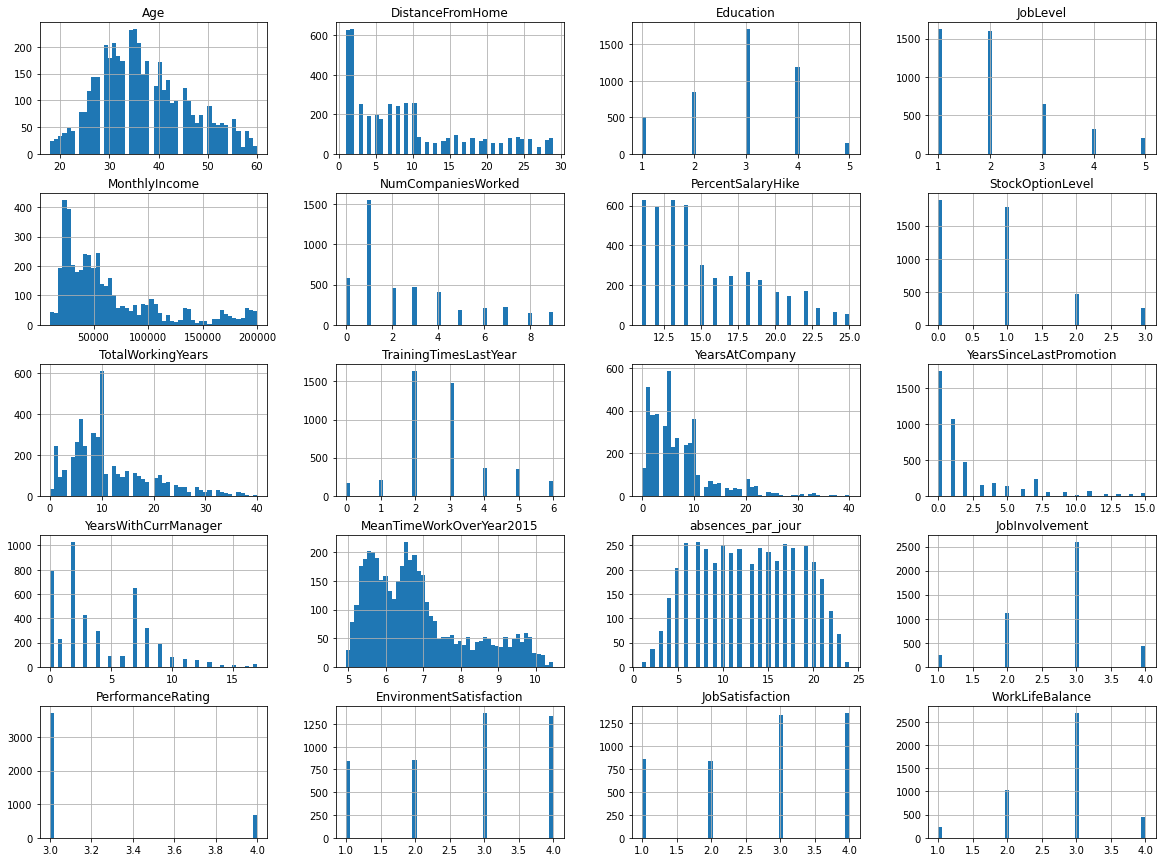

In [25]:
final_data.hist(bins=50, figsize=(20,15))
plt.show()

#### Corrélation des données

Maintenant nous voulons voir si nos valeurs possèdent des liens entre-elles. Pour cela nous utilisons une matrice de corrélation. Elle permet d'évaluer la dépendence entre plusieurs variables en même temps. Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres.


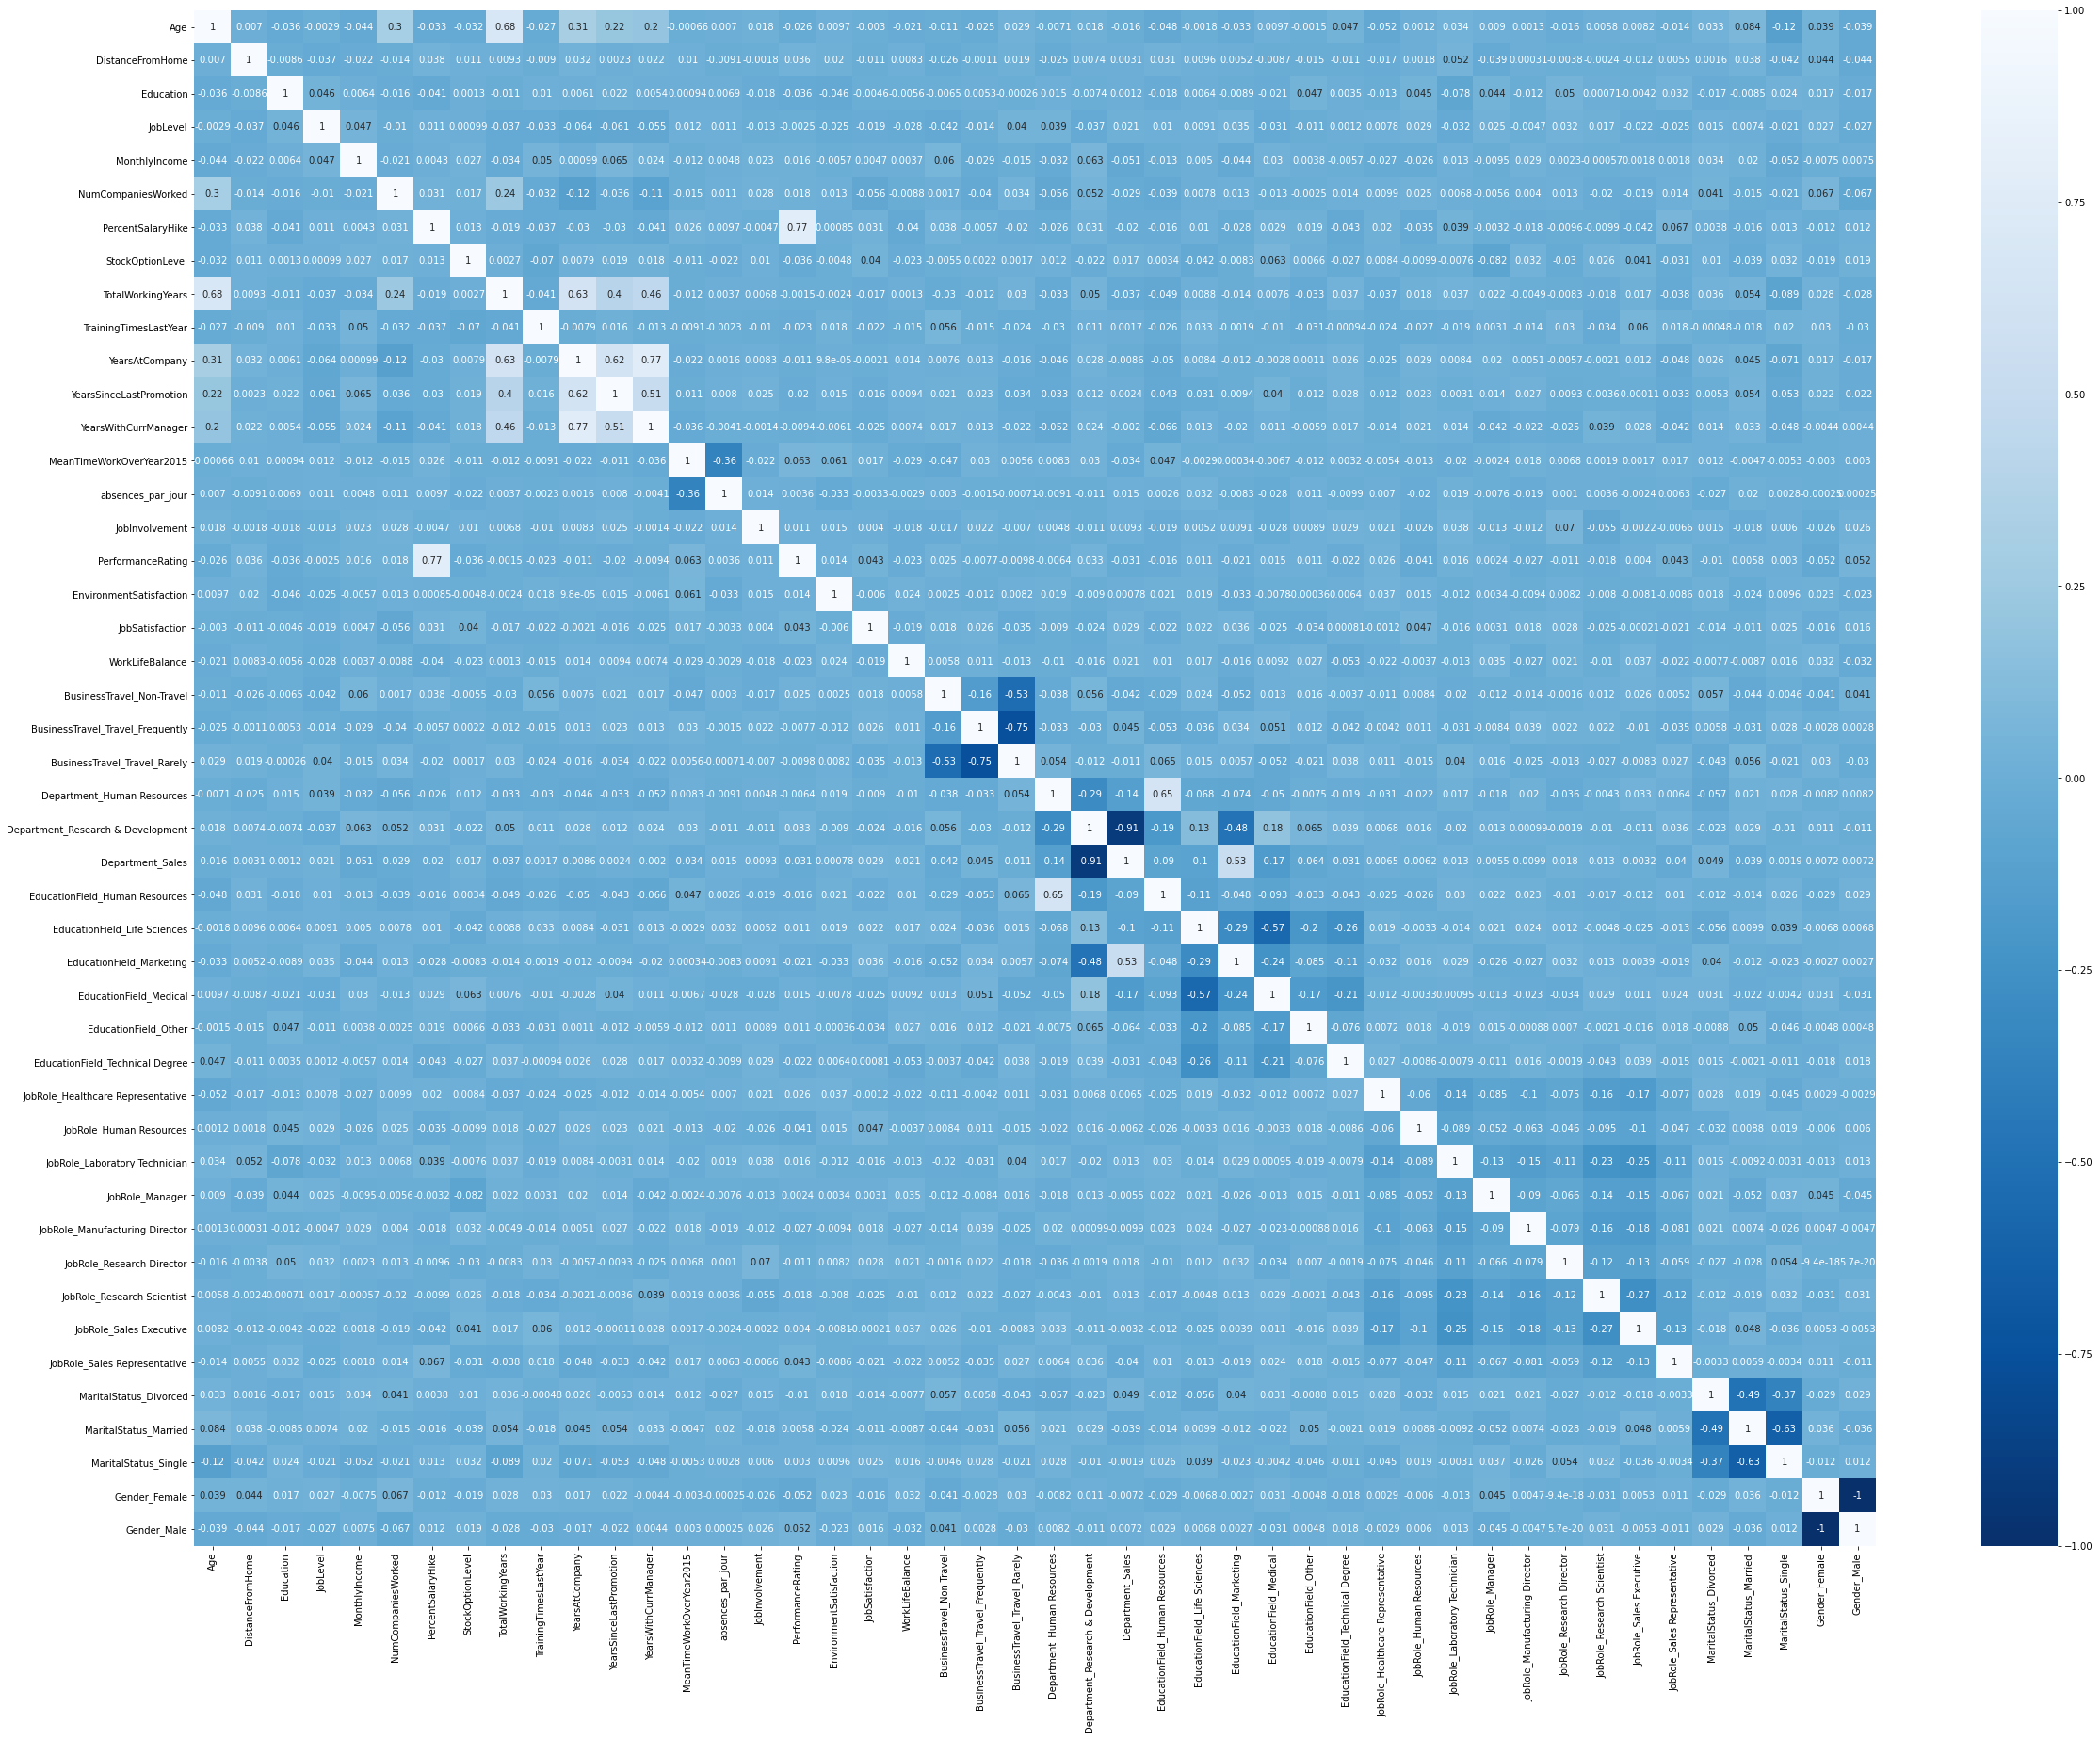

feature1                           feature2  \
2114                   Gender_Male                      Gender_Female   
1174              Department_Sales  Department_Research & Development   
562           YearsWithCurrManager                     YearsAtCompany   
742              PerformanceRating                  PercentSalaryHike   
1033  BusinessTravel_Travel_Rarely   BusinessTravel_Travel_Frequently   

      Correlation  
2114         1.00  
1174         0.91  
562          0.77  
742          0.77  
1033         0.75

In [26]:
# Matrice de corrélation
corr_matrix = final_data2.corr(method="pearson")

plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix, annot= True, cbar=True, cmap="Blues_r")
plt.show()

corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_matrix = corr_matrix.unstack().reset_index()
corr_matrix.columns = ["feature1", "feature2", "Correlation"]
corr_matrix.dropna(subset = ['Correlation'], inplace = True)
corr_matrix['Correlation'] = round(corr_matrix['Correlation'], 2)
corr_matrix['Correlation'] = abs(corr_matrix['Correlation'])
corr_matrix = corr_matrix.sort_values(by = 'Correlation', ascending = False)
value_high_corr = corr_matrix[corr_matrix['Correlation']>0.7]

value_high_corr

In [27]:
# Suppression cols
cols_pas_ethic = ["Gender_Male", "Gender_Female", "YearsWithCurrManager", "PerformanceRating", "Age", "MaritalStatus_Single", "MaritalStatus_Married", "MaritalStatus_Divorced"]
cols_big_corr = ["Department_Sales", "BusinessTravel_Travel_Rarely"]

final_data4 = final_data3.drop(cols_pas_ethic,axis=1)
final_data4 = final_data4.drop(cols_big_corr,axis=1)
final_data4.describe().T

count          mean       std       min  \
DistanceFromHome                   4410.0  5.035025e-18  1.000113 -1.010909   
Education                          4410.0  3.240794e-16  1.000113 -1.868426   
JobLevel                           4410.0  1.497416e-16  1.000113 -0.961486   
MonthlyIncome                      4410.0  2.864929e-17  1.000113 -1.167343   
NumCompaniesWorked                 4410.0 -8.408492e-17  1.000113 -1.079486   
PercentSalaryHike                  4410.0  2.486044e-16  1.000113 -1.150554   
StockOptionLevel                   4410.0  2.125032e-16  1.000113 -0.932014   
TotalWorkingYears                  4410.0 -4.886492e-17  1.000113 -1.450719   
TrainingTimesLastYear              4410.0 -2.515499e-16  1.000113 -2.171982   
YearsAtCompany                     4410.0 -8.197021e-17  1.000113 -1.144294   
YearsSinceLastPromotion            4410.0 -2.808285e-17  1.000113 -0.679146   
MeanTimeWorkOverYear2015           4410.0  2.769767e-16  1.000113 -1.438329   
absences_par_jour                  4410.0 -5.991680e-18  1.000113 -2.132358   
JobInvolvement                     4410.0 -8.161776e-17  1.000113 -2.432006   
EnvironmentSatisfaction            4410.0  1.203371e-17  1.000113 -1.583120   
JobSatisfaction                    4410.0 -1.206833e-16  1.000113 -1.573999   
WorkLifeBalance                    4410.0  1.906512e-16  1.000113 -2.506879   
BusinessTravel_Non-Travel          4410.0  1.482815e-17  1.000113 -0.337100   
BusinessTravel_Travel_Frequently   4410.0  1.905757e-17  1.000113 -0.481859   
Department_Human Resources         4410.0  1.106711e-15  1.000113 -0.211604   
Department_Research & Development  4410.0  2.126795e-16  1.000113 -1.374051   
EducationField_Human Resources     4410.0  5.174369e-16  1.000113 -0.136788   
EducationField_Life Sciences       4410.0  9.400392e-17  1.000113 -0.837490   
EducationField_Marketing           4410.0 -7.263024e-17  1.000113 -0.348255   
EducationField_Medical             4410.0  1.257749e-16  1.000113 -0.679141   
EducationField_Other               4410.0 -2.571261e-16  1.000113 -0.243059   
EducationField_Technical Degree    4410.0  4.302177e-16  1.000113 -0.314093   
JobRole_Healthcare Representative  4410.0 -8.385834e-17  1.000113 -0.312785   
JobRole_Human Resources            4410.0 -1.410688e-16  1.000113 -0.191498   
JobRole_Laboratory Technician      4410.0 -1.524606e-16  1.000113 -0.462464   
JobRole_Manager                    4410.0 -3.623456e-16  1.000113 -0.273059   
JobRole_Manufacturing Director     4410.0 -4.686601e-16  1.000113 -0.330808   
JobRole_Research Director          4410.0  1.207147e-17  1.000113 -0.239904   
JobRole_Research Scientist         4410.0  7.711141e-17  1.000113 -0.497873   
JobRole_Sales Executive            4410.0  4.304946e-17  1.000113 -0.533821   
JobRole_Sales Representative       4410.0 -2.760452e-16  1.000113 -0.244625   

                                        25%       50%       75%       max  
DistanceFromHome                  -0.887515 -0.270544  0.593216  2.444129  
Education                         -0.891688  0.085049  1.061787  2.038524  
JobLevel                          -0.961486 -0.057788  0.845911  2.653309  
MonthlyIncome                     -0.763209 -0.336552  0.398837  2.867626  
NumCompaniesWorked                -0.678464 -0.277442  0.524602  2.529712  
PercentSalaryHike                 -0.877232 -0.330589  0.762698  2.675949  
StockOptionLevel                  -0.932014  0.241988  0.241988  2.589994  
TotalWorkingYears                 -0.678877 -0.164315  0.478886  3.694896  
TrainingTimesLastYear             -0.620189  0.155707  0.155707  2.483396  
YearsAtCompany                    -0.654454 -0.327893  0.325228  5.386914  
YearsSinceLastPromotion           -0.679146 -0.368715  0.252146  3.977310  
MeanTimeWorkOverYear2015          -0.802324 -0.219319  0.467794  2.748705  
absences_par_jour                 -0.860360  0.048210  0.775066  2.047063  
JobInvolvement                    -1.026167  0.3

C:\Users\laeti\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

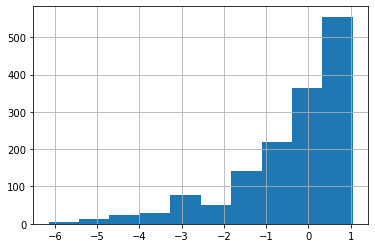

In [28]:
final_data4["MonthlyIncome"] = np.log(final_data4["MonthlyIncome"])
final_data4["MonthlyIncome"].hist()

<a id="section_4_2"></a>

### Analyse de l'attrition

Maintenant que nous avons analyser les paramêtres indépendament de l'attrition, nous allons regarder leur influence sur cette dernière.

#### Courbes de densité superposées

A l'aide des courbes de densité superposées, nous regardons la répartition des valeurs quantitatives pour chaque variables en fonction de l'attrition. 

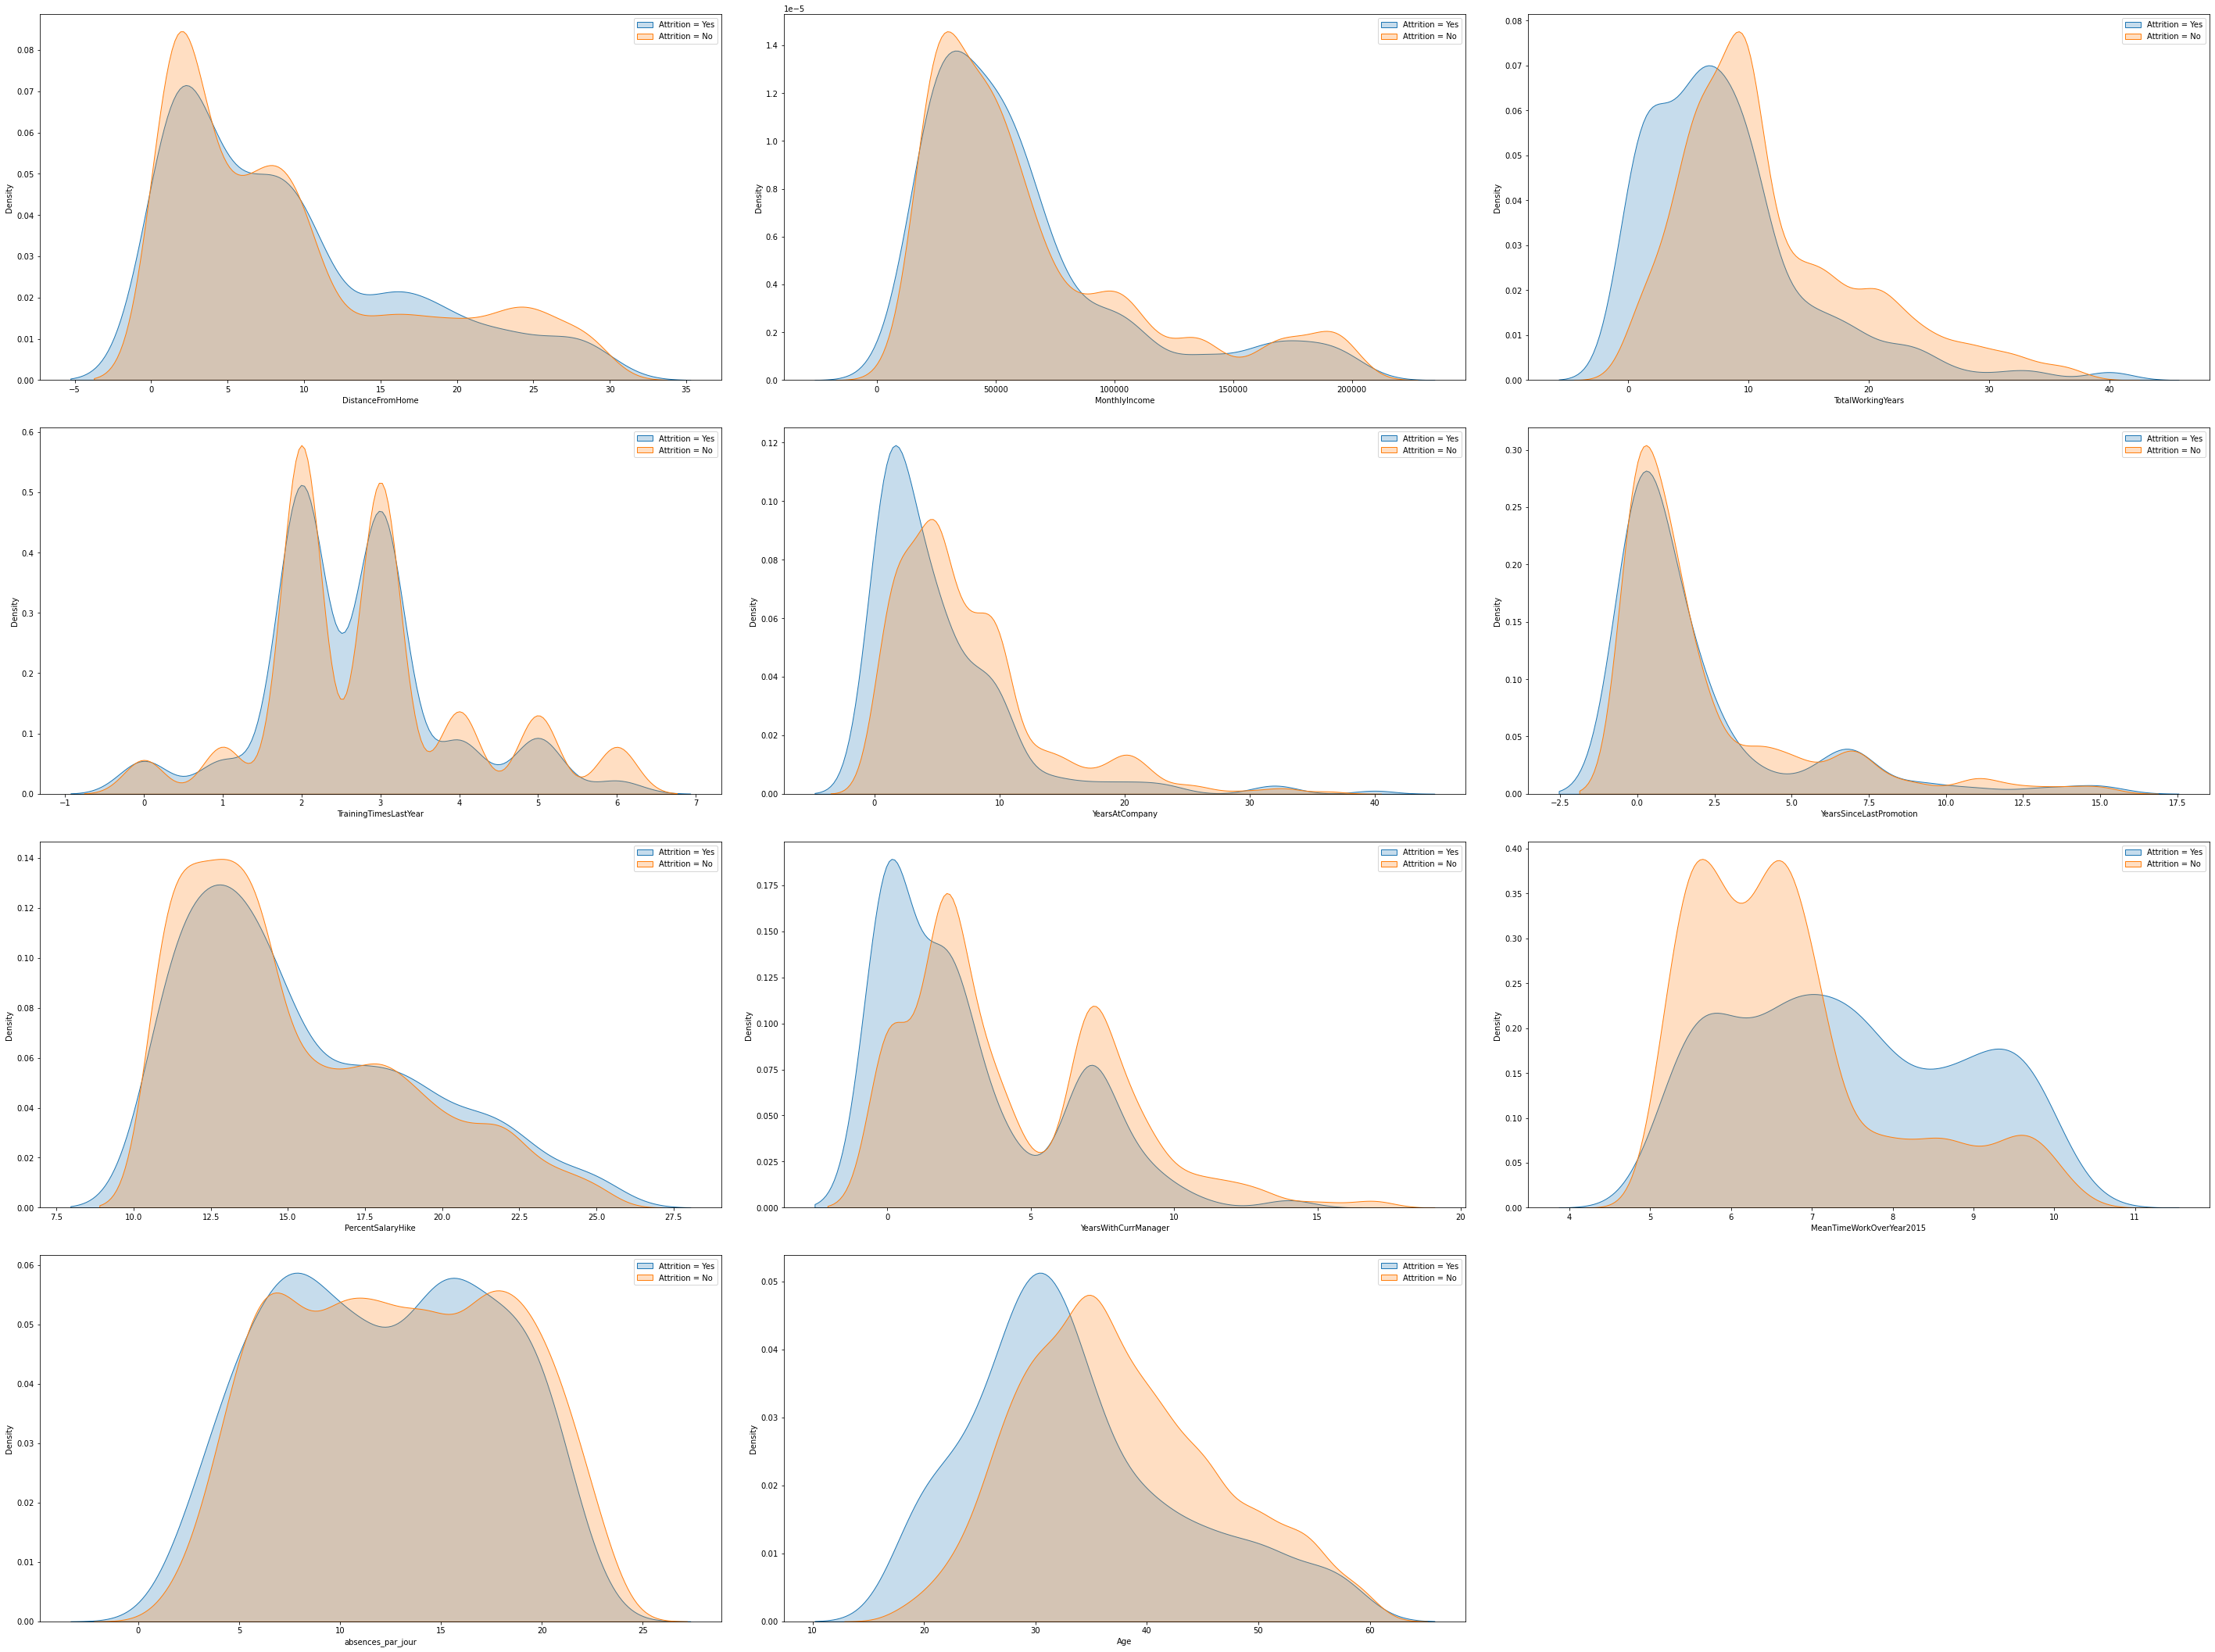

In [29]:
def area_chart(df,feature):
    ax=sns.kdeplot(df[df['Attrition']=='Yes'][feature],
             shade=True,label='Attrition = Yes')
    ax=sns.kdeplot(df[df['Attrition']=='No'][feature],
                 shade=True,label='Attrition = No')
    ax.legend()

cols = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager','MeanTimeWorkOverYear2015','absences_par_jour', "Age"]

plt.figure(figsize=(40,30))
for i, col in enumerate(cols):
    ax = plt.subplot(4, 3, i+1)
    area_chart(final_data, col)
    # for bar in plots.patches:
    #     percentage = '{:.1f}%'.format(100 * bar.get_height() / len(final_data[col]))
    #     x = bar.get_x() + bar.get_width() / 2
    #     y = bar.get_height()
    #     plots.annotate(percentage, (x, y),ha='center',va='center',size=15, xytext=(0, 3),
    #                textcoords='offset points')
plt.tight_layout(pad=3.0)
plt.show()

Cependant comme nous voyons peu de différence à l'oeil nu, nous allons dans un deuxième temps des boites à moustache.

#### Boîtes à moustache

A l'aide de boites à moustache, nous regardons la répartition des valeurs quantitatives pour chaque variables en fonction de l'attrition.

In [30]:
cols = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager','MeanTimeWorkOverYear2015','absences_par_jour']

plot_rows=2
plot_cols=5
fig = make_subplots(rows=plot_rows, cols=plot_cols,subplot_titles=(cols))

col_i = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        for t in px.box(final_data, x="Attrition", y=cols[col_i]).data:
            fig.add_trace(t,row=i, col=j)

        col_i=col_i+1
fig.update_layout(height=600, width=1200)
fig.show()

#### Histogrammes

A l'aide des histogrammes, nous regardons la répartition des valeurs qualitatives pour chaque variables en fonction de l'attrition.

<ipython-input-31-4d9f497a20d4>:22: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:23: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:22: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:23: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:22: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:23: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:22: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:23: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:22: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-31-4d9f497a20d4>:23: RuntimeWarning:

invalid value encountered in longlong_scalars



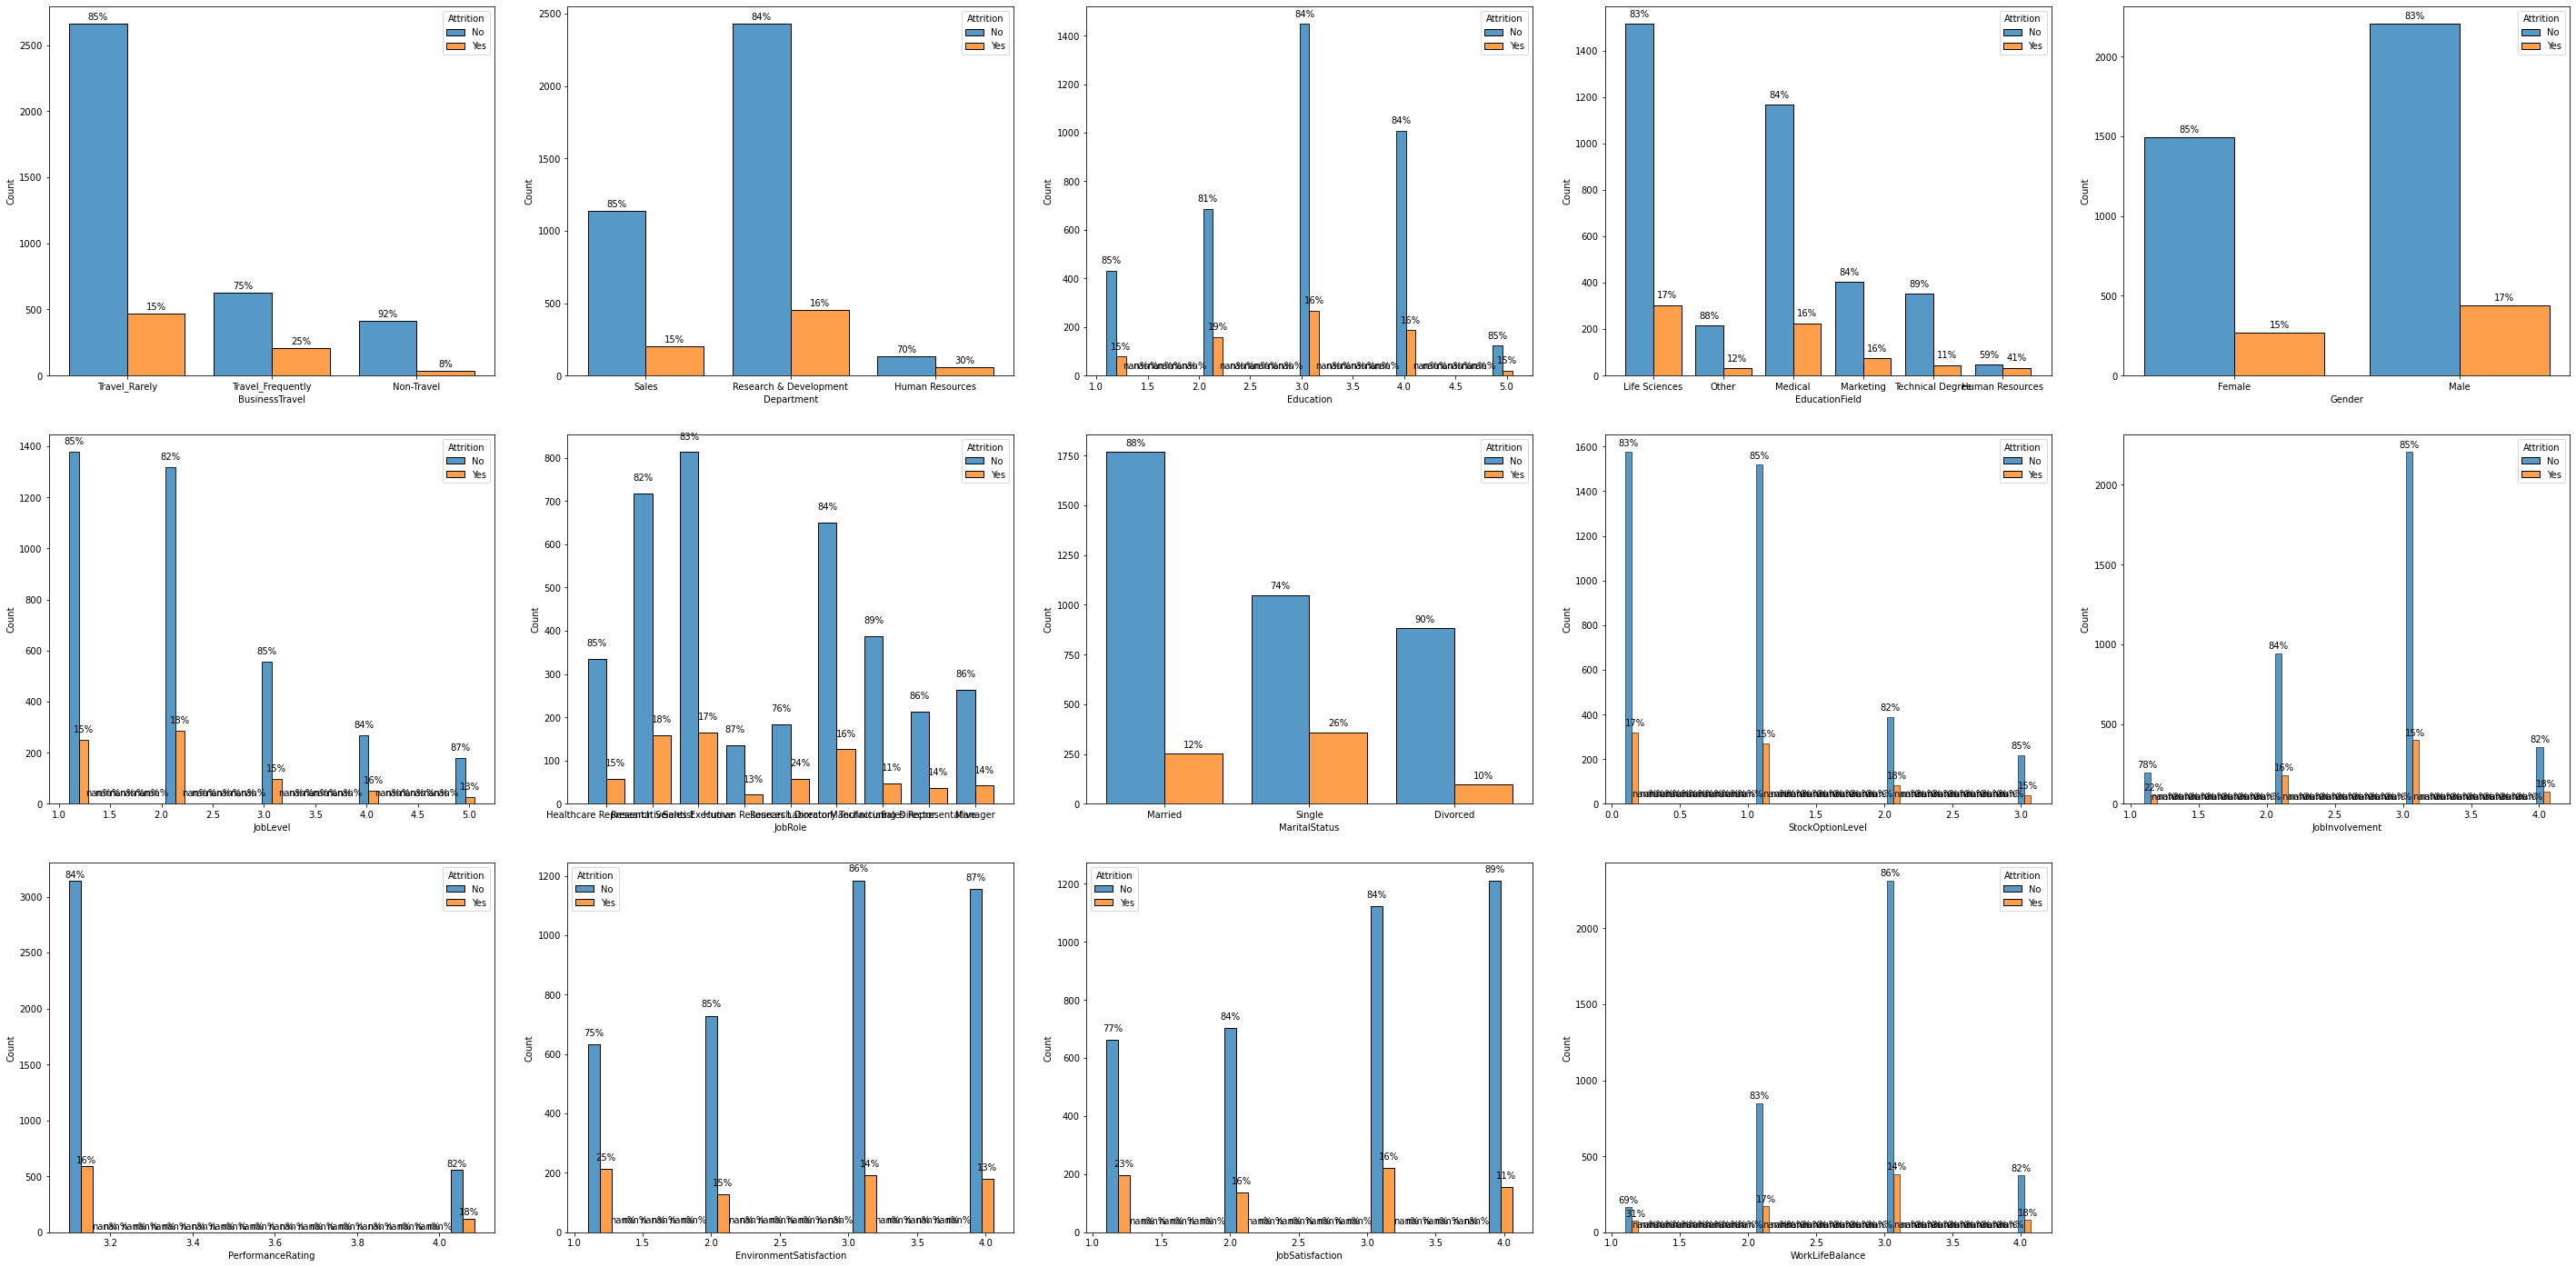

In [31]:
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

plt.figure(figsize=(40,20))
for i, col in enumerate(cols):
    ax = plt.subplot(3, 5, i+1)
    plots = sns.histplot(data=final_data, x=col, ax=ax, hue=final_data['Attrition'], multiple='dodge', shrink=0.8)


    # From axis.patches get bar lengths
    get_bars = plots.patches
    half_bar_length = int(len(get_bars)/2)
    bar_left = get_bars[:half_bar_length]
    bar_right = get_bars[half_bar_length:]
    
    # Place %employees on top of each bar
    for L, R in zip(bar_left, bar_right):
        left_height = L.get_height()
        right_height = R.get_height()
        length_total = left_height + right_height

        # place calculated employee percentage on top of each bar
        ax.text(L.get_x() + L.get_width()/2., left_height + 30, '{0:.0%}'.format(left_height/length_total), ha="center")
        ax.text(R.get_x() + R.get_width()/2., right_height + 30, '{0:.0%}'.format(right_height/length_total), ha="center")
plt.tight_layout(pad=3.0)
plt.show()


<a id="chapter5"></a>
## Algorithmes

In [46]:
# Listes des algorithmes  
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Perceptron": Perceptron(),
          "Descente de gradient": SGDClassifier()}

# fonction appliquant un fit et score sur chacun des modeles
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # Fixer un seed pour avoir les mêmes résultats à chaque essai 
    np.random.seed(42)
    
    # Dictionnaire pour sauvegarder les scores
    model_scores = {}
    for name, model in models.items():
        # Fit le modèle
        model.fit(X_train, y_train)
        # Evaluer le modèle selon le score de chaque algorithme
        model_scores[name] = model.score(X_train, y_train)
#         scores_val = cross_val_score(model, X_train, y_train, cv=10)
#         print(scores_val.mean())
        
    return model_scores

In [50]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8639455782312925,
 'KNN': 0.94359410430839,
 'Random Forest': 1.0,
 'Perceptron': 0.7993197278911565,
 'Descente de gradient': 0.8520408163265306}

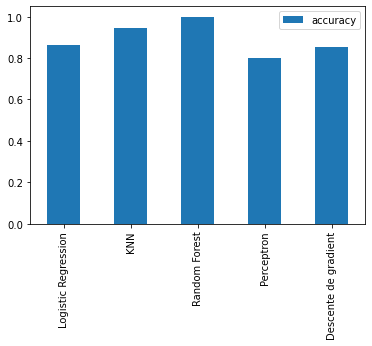

In [34]:
# Comparaison des résultats obtenus
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [35]:
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

# scores = cross_val_score(log_reg, X_train, y_train, cv=10)
# print(scores)

[0.86968839 0.8470255  0.86402266 0.85269122 0.84419263 0.86968839
 0.86685552 0.86685552 0.85227273 0.85511364]
